# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)


Attribute Information:

Age of patient at time of operation (numerical)<br>
Patient’s year of operation (year — 1900, numerical)<br>
Number of positive auxillary nodes detected (numerical)<br>
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [1]:
#importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#ignore warning messages
import warnings
warnings.filterwarnings('ignore')

# 1.Overview

### 1.1 DataPrepration

In [2]:
#reading csv file and nameing coloumns as "Age", "Operation_Year", "axil_nodes", "Surv_status"
HCS=pd.read_csv("haberman.csv",names = ["Age", "Operation_Year", "axil_nodes", "Surv_status"])
#print the shape of HCS dataFrame
print(HCS.shape)
#checking if there is any nan value
print(HCS.isnull().values.any())

(306, 4)
False


In [3]:
#counting the no of point based upon survival status
HCS["Surv_status"].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

In [4]:
#finding the min and max age
print(HCS["Age"].min())
print(HCS["Age"].max())

30
83


### Conclusion
1.Total datapoint 306 and 4 attribute<br>

2.isnull() return false so there is no nan value so we are good to go<br>

3.From above value we can conclude that out of 306 patient 225 patient survived for 5 years or longer while 81 patient die within 5 year.<br>

4.Min age of patient is 30<br>

5.Max age of pateint is 83<br>

### 1.2 High level statistics

In [5]:
print("Median")
print(np.median(HCS["Age"]))
print(np.median(HCS["axil_nodes"]))
HCS.describe()

Median
52.0
1.0


,Age,Operation_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# 2.Objective

To predict Patient survived more than 5 years or die within 5 years based upon their Age,AxilNode

# 3.Univaraite analysis

### 3.1 PDF

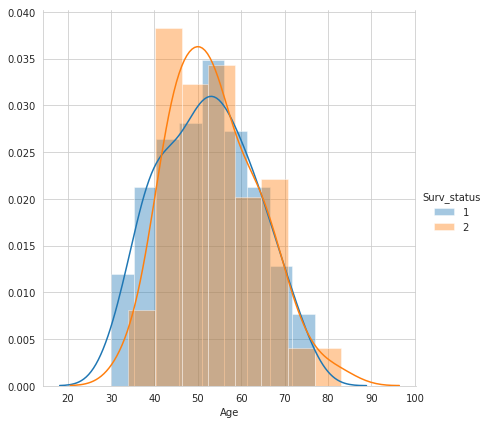

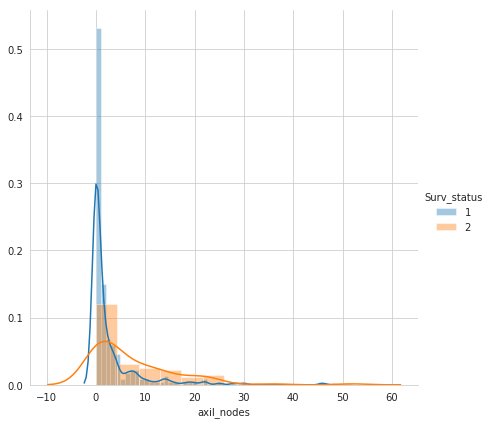

In [6]:
sns.set_style('whitegrid')
sns.FacetGrid(HCS, hue="Surv_status",height=6).map(sns.distplot,"Age").add_legend()
sns.FacetGrid(HCS, hue="Surv_status",height=6).map(sns.distplot,"axil_nodes").add_legend()
plt.show()

### Conclusion
1.Age Pdf-No of Patient died between age 40-70 is high and most patient died at age 50<br>
        -No of Patient survived between age 30-40 is high and most patient survived at age 55</br>
        
2.axil_node pdf-no of patient survived is more when axilNode is between 0-5.<br>
                -no of patient died is more when axilNode is between 5-30. as axilNode is increasing reduce the chance of survival<br>

### 3.2 CDF

#### 3.2.1 AGE CDF

In [7]:
status_1=HCS[HCS["Surv_status"]==1]
status_2=HCS[HCS["Surv_status"]==2]

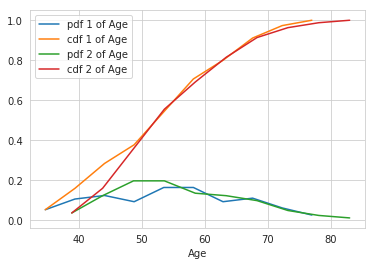

In [8]:
#calucating pdf and cdf Age of pateint survived  >5years
counts, bin_edges = np.histogram(status_1["Age"], bins=10,density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf 1 of Age")
plt.plot(bin_edges[1:], cdf,label="cdf 1 of Age")

#calucating pdf and cdf Age of pateint died within 5 years  
counts, bin_edges = np.histogram(status_2["Age"], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf 2 of Age")
plt.plot(bin_edges[1:], cdf,label="cdf 2 of Age")
plt.xlabel("Age")
plt.legend()
plt.show()

### Conclusion
-40% chances of surviving when age is around 45 as cdf1(cdf of survived pateint) is more than cdf2(cdf of dead pateint) between age 30-45 so there are more chances of surival.

#### 3.2.2 AxilNode CDF

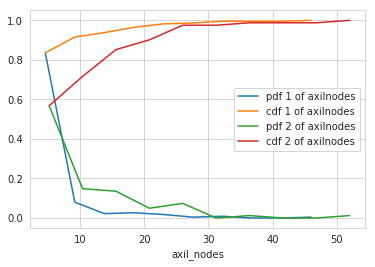

In [9]:
#calucating pdf and cdf Age of pateint survied>5 years
counts, bin_edges = np.histogram(status_1["axil_nodes"], bins=10,density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf 1 of axilnodes")
plt.plot(bin_edges[1:], cdf,label="cdf 1 of axilnodes")

#calucating pdf and cdf Age of pateint died within 5 years
counts, bin_edges = np.histogram(status_2["axil_nodes"], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf 2 of axilnodes")
plt.plot(bin_edges[1:], cdf,label="cdf 2 of axilnodes")
plt.xlabel("axil_nodes")
plt.legend()
plt.show()

### Conclusion
cdf1(cdf of survived pateint) is more than cdf2(cdf of dead pateint) so survival chance are more

### 3.3 BoxPlot

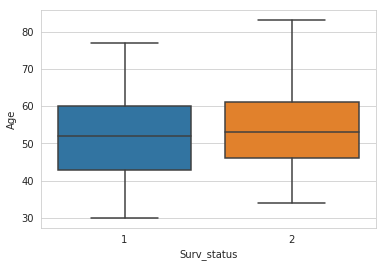

In [10]:
#Boxplot using Age and surv_staus
sns.boxplot(x='Surv_status',y='Age', data=HCS)
plt.show()

### Conclusion
From survived patient>5years{1}<br> -Median=52<br>
                                -25percentile=44<br>
                                -75percentile=61<br>
From pateint died within 5 years{2}<br>-Median=53<br>
                                   -25pecentile=46<br>
                                   -75percentile=61<br>

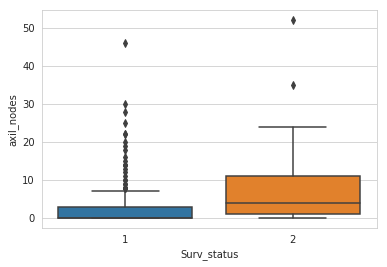

In [11]:
#Boxplot using AxilNode and surv_staus
sns.boxplot(x='Surv_status',y='axil_nodes', data=HCS)
plt.show()

### Conclusion
From survived patient>5years{1}<br>-Median=0<br>
                                -25percentile=0<br>
                                -75percentile=3<br>
From pateint died within 5 years{2}<br>-Median=4<br>
                                   -25pecentile=1<br>
                                   -75percentile=11<br>

### 3.4 violinPlot

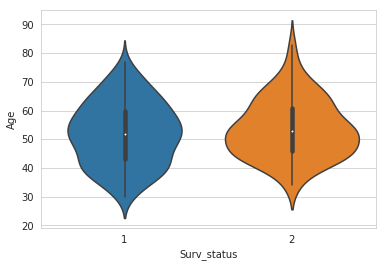

In [16]:
#violinPlot using Age and surv_staus
sns.violinplot(x='Surv_status',y='Age',data=HCS)
plt.show()

### Conclusion
From survived patient>5years{1}<br> -Median=52<br>
                                -25percentile=44<br>
                                -75percentile=61<br>
From pateint died within 5 years{2}<br>-Median=53<br>
                                   -25pecentile=46<br>
                                   -75percentile=61<br>

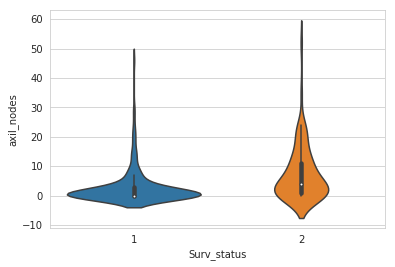

In [17]:
#violinPlot using axil_nodes and surv_staus
sns.violinplot(x='Surv_status',y='axil_nodes',data=HCS)
plt.show()

### Conclusion
From survived patient>5years{1}<br>-Median=0<br>
                                -25percentile=0<br>
                                -75percentile=3<br>
From pateint died within 5 years{2}<br>-Median=4<br>
                                   -25pecentile=1<br>
                                   -75percentile=11<br>

## 4.Bi-variate analysis

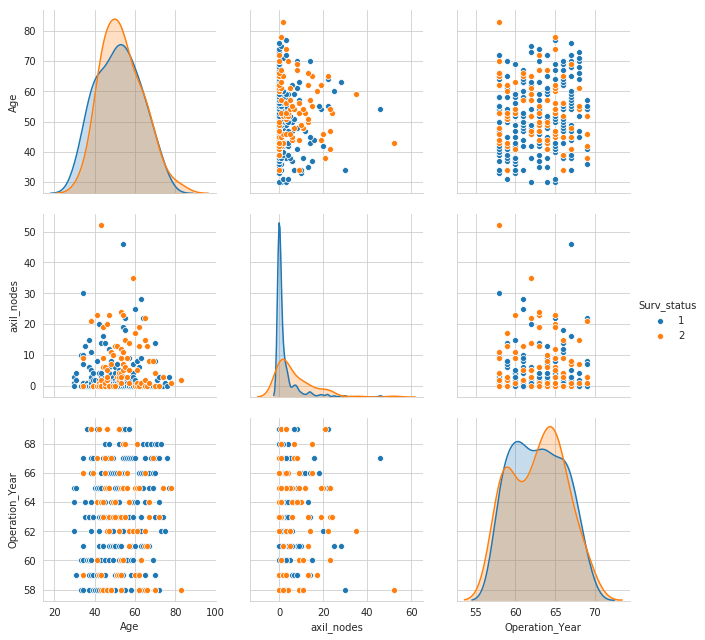

In [14]:
sns.set_style("whitegrid")
#df = HCS.drop(columns = ['Surv_status'])
sns.pairplot(HCS, hue='Surv_status', size=3,vars=["Age", "axil_nodes","Operation_Year"])
plt.show()

### Conclusion
    All the datapoint are inseparable it is very diffcult to predict to patient will survived >5years or not using bi-variate analysis

# Final conclusion

1.Age-No of Patient died between age 40-70 is high and most patient died at age 50
-No of Patient survived between age 30-40 is high and most patient survived at age 55

2.axil_node-no of patient survived is more when axilNode is between 0-5.
-no of patient died is more when axilNode is between 5-30. as axilNode is increasing reduce the chance of survival

3.40% chances of surviving when age is around age 45 between age 30-45 so there are more chances of surival.

4.percentage of survival is more when axil node is between from 0 to 5.